In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [9]:


# Load and preprocess the data
file_path = r"C:\Users\HP\Documents\data mining\backtest-template-v2 (10).csv"
data = pd.read_csv(file_path, sep=';')


In [10]:
# Feature Engineering
data['Profit/Loss'] = np.where(data['Keterangan'] == 'TP', 
                                data['TP'] - data['Entry'], 
                                data['Entry'] - data['SL'])
data['Price_Difference'] = data['TP'] - data['SL']
data['Relative_Entry'] = (data['Entry'] - data['SL']) / (data['TP'] - data['SL'])


In [11]:
# Prepare features and target
features = ['Entry', 'TP', 'SL', 'Profit/Loss', 'Price_Difference', 'Relative_Entry']
X = data[features]
y = data['Keterangan']

In [12]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [14]:
# Try different pruning approaches
pruning_depths = [3, 4, 5, 6]
best_depth = 0
best_score = 0

for depth in pruning_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Use cross-validation for more robust evaluation
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_depth = depth


In [15]:
# Train the best model
best_dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
# Predictions and evaluation
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [17]:
# Profit/Loss Analysis
total_profit = data[data['Keterangan'] == 'TP']['Profit/Loss'].sum()
total_loss = data[data['Keterangan'] == 'SL']['Profit/Loss'].sum()
win_rate = len(data[data['Keterangan'] == 'TP']) / len(data) * 100


In [18]:
# Print results
print(f"Best Pruning Depth: {best_depth}")
print(f"Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(report)
print("\nProfit/Loss Analysis:")
print(f"Total Profit: ${total_profit:.2f}")
print(f"Total Loss: ${total_loss:.2f}")
print(f"Net Profit: ${total_profit + total_loss:.2f}")
print(f"Win Rate: {win_rate:.2f}%")


Best Pruning Depth: 3
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          SL       1.00      1.00      1.00        13
          TP       1.00      1.00      1.00        33

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46


Profit/Loss Analysis:
Total Profit: $-20.00
Total Loss: $72.00
Net Profit: $52.00
Win Rate: 70.31%


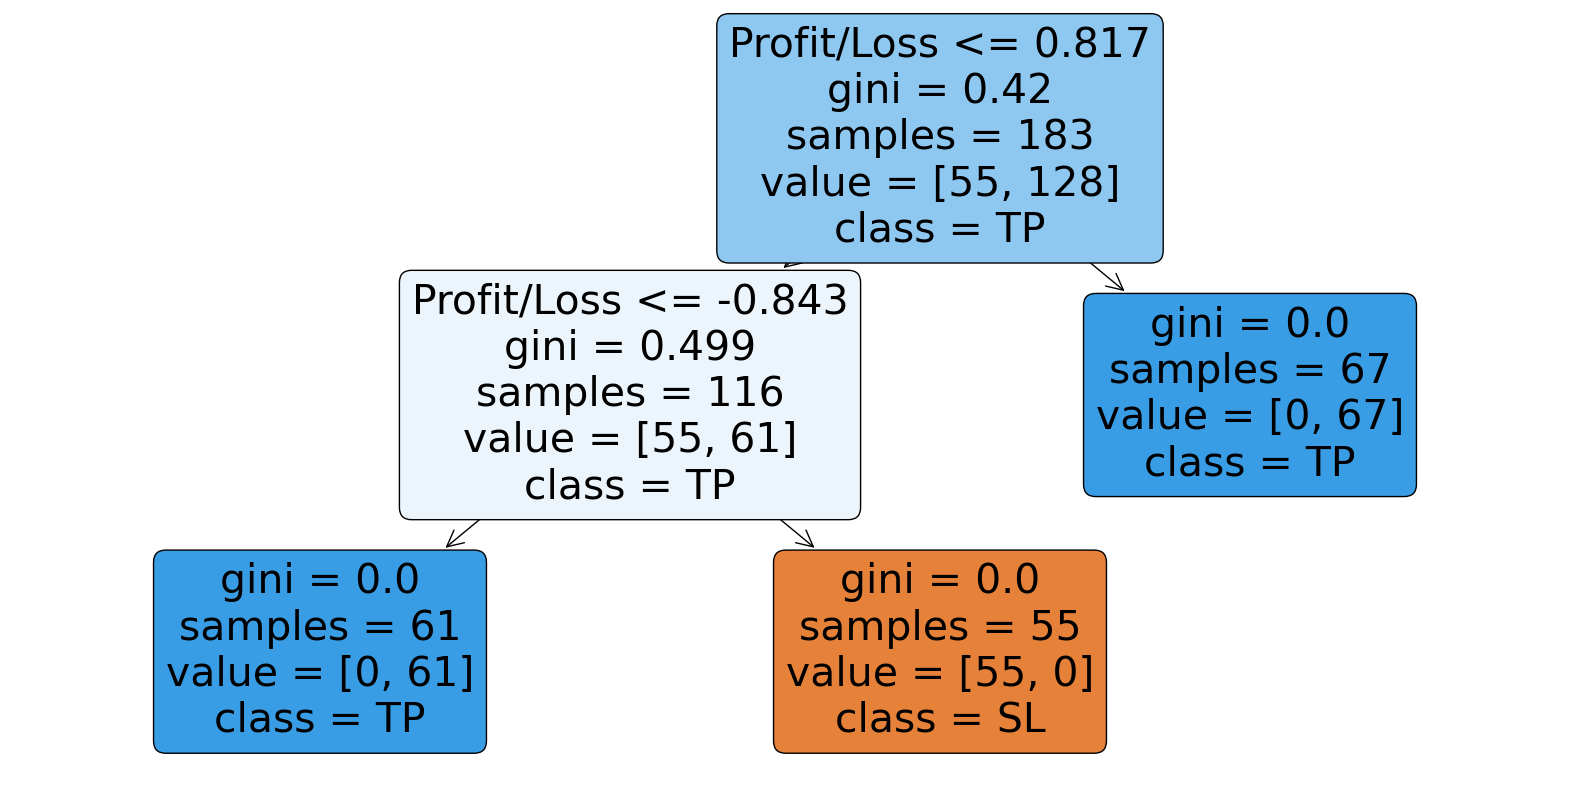

In [19]:
# Tree Visualization (optional)


plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=features, class_names=best_dt.classes_, filled=True, rounded=True)
plt.show()